Import the Required libraries

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

Loading Dataset

In [2]:
from sklearn.datasets import load_boston

boston_df = pd.read_csv("C:/Users/kukad/Documents/GitHub/Boston-Linear Regression/Data/boston.csv")

boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Data Pre-Processing

In [3]:
boston_df.drop("Unnamed: 0", axis = 1, inplace = True)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_df.shape

(506, 14)

In [5]:
# checking if there is any null value
boston_df.isnull().values.any()

False

In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Visualization

C:\Users\kukad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


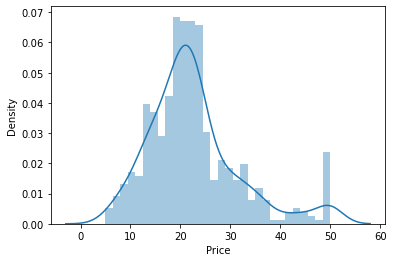

In [7]:
# Create a histogram that depicts the target values' distribution.
sns.distplot(boston_df['Price'], bins=30)
plt.show()

<AxesSubplot:>

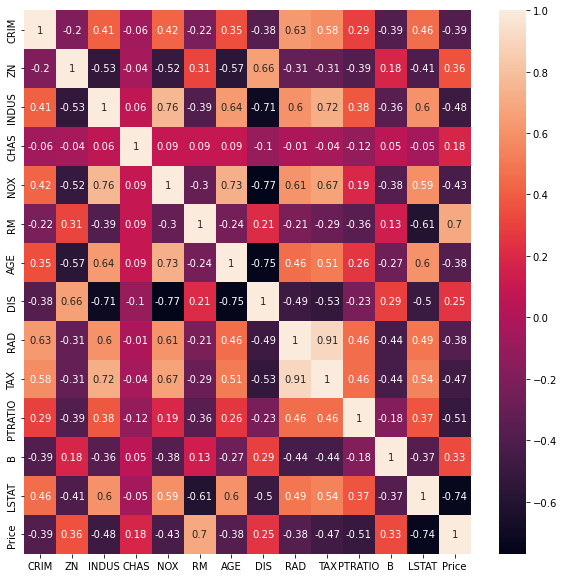

In [8]:
# for all columns, compute the pairwise correlation
correlationMatrix = boston_df.corr().round(2)
plt.figure(figsize = (10, 10))
# To plot the correlation matrix, we use the heatmap function from seaborn.
# annot = True (for printing the values inside the square)
sns.heatmap(data = correlationMatrix, annot = True)

The correlation coefficient might be anything between -1 and 1. If the value is near 1, it suggests that the two variables have a high positive association. The variables have a high negative association when it is close to -1. 

The correlation matrix shows that RM has a high positive correlation (0.7) with Price, whereas LSTAT has a strong negative correlation with Price (-0.74).

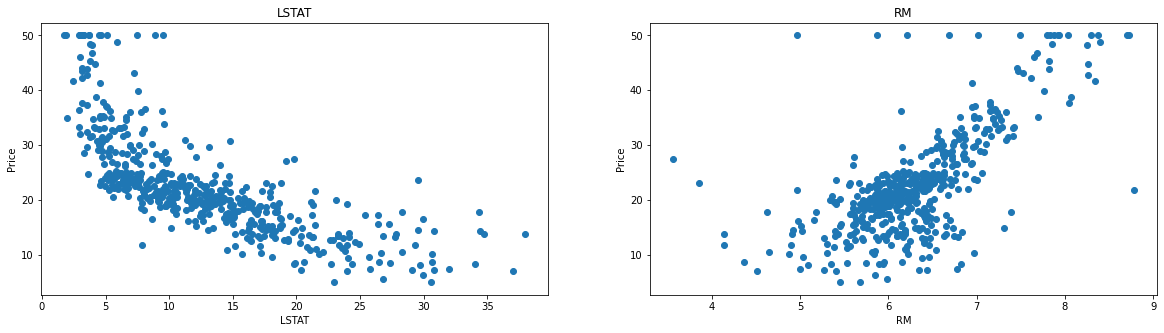

In [16]:
features = ['LSTAT', 'RM']
target = boston_df['Price']

plt.figure(figsize = (20, 5))

for j, column in enumerate(features):
    plt.subplot(1, len(features) , j+1)
    x = boston_df[column]
    y = target
    plt.scatter(x, y, marker = 'o')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Price')

In [18]:
X = pd.DataFrame(np.c_[boston_df["LSTAT"], boston_df["RM"]], columns = ['LSTAT','RM'])
Y = boston_df["Price"]

Splitting the data into training and testing sets

In [21]:
X_train.head()

,LSTAT,RM
42,5.81,6.169
58,6.86,6.145
385,30.81,5.277
78,12.34,6.232
424,17.16,5.565


In [19]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# to ensure consistency assign any value to random_state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [23]:
# model evaluation for the training set
 
predicted_y_train = regressor.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, predicted_y_train)))
r2 = r2_score(Y_train, predicted_y_train)
 
print("The model's training set performance :-")
print('RMSE is : {}'.format(rmse))
print('R2 score is : {}'.format(r2))
print()
 
# model evaluation for Test set
 
predicted_y_test = regressor.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, predicted_y_test)))
 
# r-squared score of the model
r2 = r2_score(Y_test, predicted_y_test)
 
print("The model's testing set performance")
print('RMSE is : {}'.format(rmse))
print('R2 score is : {}'.format(r2))

The model's training set performance :-
RMSE is : 5.5025616762333085
R2 score is : 0.6251836356449056

The model's testing set performance
RMSE is : 5.664252472426874
R2 score is : 0.6753556251471672
